In [1]:
import numpy as np 
import pandas as pd 
import os

In [2]:
dt = pd.read_csv('Reviews.csv')
dt.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


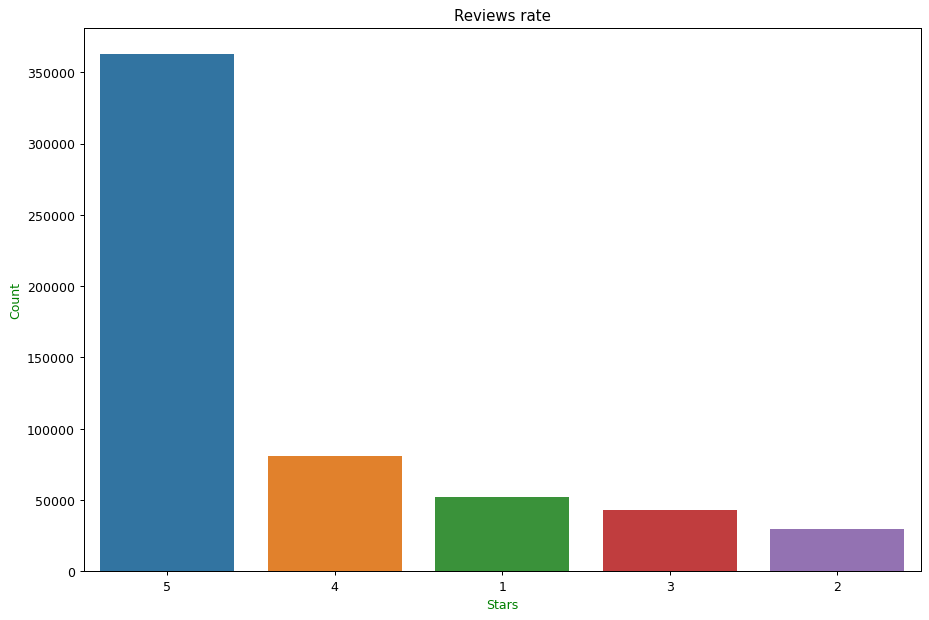

In [3]:
import seaborn as sns
import matplotlib.pyplot as ptl

plt.figure(figsize=(12,8), dpi=90)


g = sns.countplot(x='Score', data=dt, order=dt['Score'].value_counts().index)
ptl.xlabel("Stars", color='green')
ptl.ylabel("Count", color='green')

ptl.title('Reviews rate');

In [4]:
dt['score_b'] = dt['Score'].apply(lambda x: 1  if x >=4 else 0)
dt.head()[['Summary','score_b']]

,Summary,score_binary
0,Good Quality Dog Food,1
1,Not as Advertised,0
2,"""Delight"" says it all",1
3,Cough Medicine,0
4,Great taffy,1


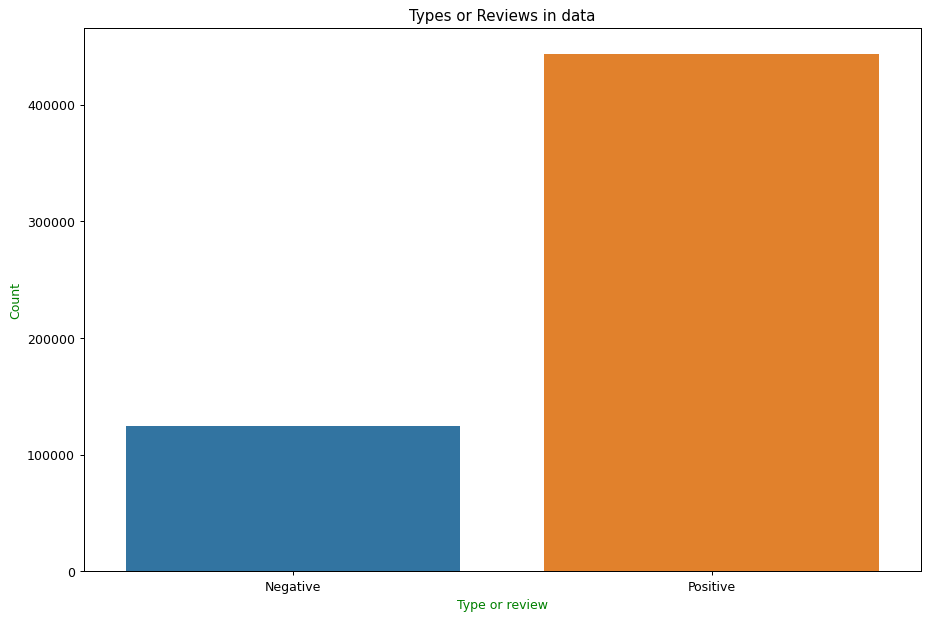

In [5]:
ptl.figure(figsize=(12,8), dpi=90)

g = sns.countplot(x='score_binary', data=dt)
ptl.xlabel("review", color='green')
plt.ylabel("Count", color='green')

ptl.xticks((0,1),('Negative','Positive'))
ptl.title('Reviews in data');

In [6]:
c = dt['ProfileName'].value_counts().sort_values(ascending=False)
c.head(10)

C. F. Hill "CFH"                          451
O. Brown "Ms. O. Khannah-Brown"           421
Gary Peterson                             389
Rebecca of Amazon "The Rebecca Review"    365
Chris                                     363
Linda                                     290
John                                      261
Mike                                      260
c2                                        256
Laura                                     253
Name: ProfileName, dtype: int64

In [7]:
nan_values = dt[['ProfileName', 'HelpfulnessNumerator', 'Score', 'Time', 'Summary', 'Text']].isna().sum().sort_values(ascending=False)
nan_values

Summary                 27
ProfileName             16
HelpfulnessNumerator     0
Score                    0
Time                     0
Text                     0
dtype: int64

In [8]:
summary_nan = dt.loc[dt['Summary'].isna()]

summary_nan[['HelpfulnessNumerator', 'Score', 'Time', 'Summary', 'Text']].head(10)

,HelpfulnessNumerator,Score,Time,Summary,Text
33958,1,2,1173312000,NaN,I only used two maybe three tea bags and got p...
40548,1,2,1173312000,NaN,I only used two maybe three tea bags and got p...
101106,1,2,1173312000,NaN,I only used two maybe three tea bags and got p...
102979,1,2,1173312000,NaN,I only used two maybe three tea bags and got p...
117515,1,2,1173312000,NaN,I only used two maybe three tea bags and got p...
155712,1,2,1173312000,NaN,I only used two maybe three tea bags and got p...
178290,1,2,1173312000,NaN,I only used two maybe three tea bags and got p...
198474,1,2,1173312000,NaN,I only used two maybe three tea bags and got p...
212691,1,2,1173312000,NaN,I only used two maybe three tea bags and got p...
237565,1,3,1328572800,NaN,This is a cool system only problem is that the...


In [9]:
duplicates = dt[dt.duplicated(['Text'])]
duplicates = duplicates.sort_values(by='Text')
duplicates[['Score','Text']].head(10)

,Score,Text
506745,4,"""4C Totally Light"" is one of the very few ""sug..."
418609,5,"""BUFFY"" LOOKS FORWARD TO HER ""TOY"" EVERY AFTER..."
561246,1,"""Blends smooth and creamy for a sweet tasting ..."
233264,1,"""Both"" of Gloria Jean's ""Hazelnut"" and ""Vanill..."
519542,1,"""Both"" of Gloria Jean's ""Hazelnut"" and ""Vanill..."
425981,1,"""Both"" of Gloria Jean's ""Hazelnut"" and ""Vanill..."
473106,1,"""Both"" of Gloria Jean's ""Hazelnut"" and ""Vanill..."
225579,1,"""Both"" of Gloria Jean's ""Hazelnut"" and ""Vanill..."
245224,1,"""Both"" of Gloria Jean's ""Hazelnut"" and ""Vanill..."
259114,4,"""Bounty"" bars consist of a soft, almost molten..."


In [10]:
df = dt[dt["Score"]!=3] 
df.shape

(525814, 11)

C:\Users\sairam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Score', ylabel='count'>

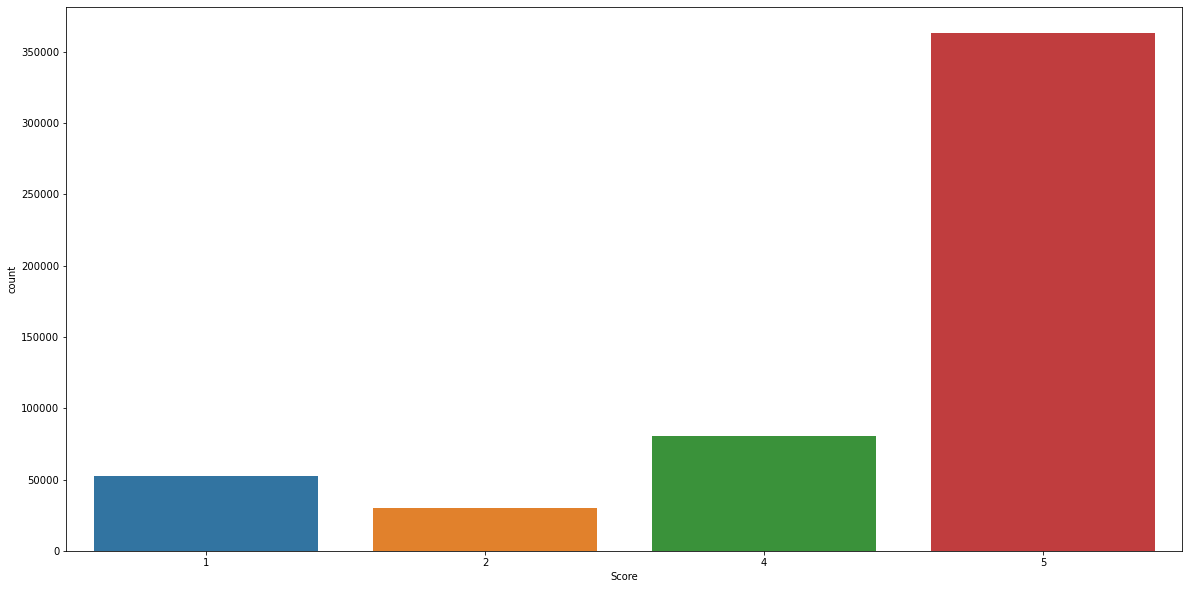

In [11]:
ptl.figure(figsize = (20,10))
sns.countplot(df['Score'])

In [12]:
df["Score"] = df["Score"].apply(lambda x : 1 if x>3 else 0)
df.head()

<ipython-input-12-cf63808b6477>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered["Score"] = data_filtered["Score"].apply(lambda x : 1 if x>3 else 0)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,score_binary
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1


In [13]:
sorted_data=df.sort_values('ProductId', kind='quicksort', na_position='last')
data_final=sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
data_final.shape

(364173, 11)

In [14]:
data_final['Score'].value_counts()

1    307063
0     57110
Name: Score, dtype: int64

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")

import re

from bs4 import BeautifulSoup
from tqdm import tqdm
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, GRU, Flatten
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential
from keras.layers import Convolution1D
from keras import initializers, regularizers, constraints, optimizers, layers

In [16]:
def decontract(text):
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

stop_words= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [17]:
def preprocess_text(review):
    review = re.sub(r"http\S+", "", review)             
    review = BeautifulSoup(review, 'lxml').get_text()   
    review = decontract(review)                         
    review = re.sub("\S*\d\S*", "", review).strip()     
    review = re.sub('[^A-Za-z]+', ' ', review)          
    review = review.lower()                             
    review = [word for word in review.split(" ") if not word in stop_words] 
    review = " ".join(review)
    review.strip()
    return review
data_final['Text'] = data_final['Text'].apply(lambda x: preprocess_text(x))
data_final['Text'].head()

150523    witty little book makes son laugh loud recite ...
150505    grew reading sendak books watching really rosi...
150506    fun way children learn months year learn poems...
150507    great little book read aloud nice rhythm well ...
150508    book poetry months year goes month cute little...
Name: Text, dtype: object

In [18]:
train_df, test_df = train_test_split(data_final, test_size = 0.4, random_state = 42)
keep_col = ['Id','ProductId','Text','Score']
train_df = train_df[keep_col]
test_df = test_df[keep_col]
print("Train data: ", train_df.shape)
print("Test data: ", test_df.shape)

Train data:  (218503, 4)
Test data:  (145670, 4)


In [19]:
train_df.head()

,Id,ProductId,Text,Score
473916,473917,B000FPDYRQ,cookies taste great could not find gf sugar co...,1
303747,303748,B001E560U4,read several different natural remedy web site...,1
434634,434635,B001EQ5K9U,enjoyed product time local grocery stores stop...,1
350992,350993,B000H25VY6,moving colorado northern vermont left us witho...,1
211701,211702,B003SBRV14,pros price much less stores charge sometimes s...,1


In [20]:
test_df.head()

,Id,ProductId,Text,Score
474313,474314,B003L1XMAA,bought based positive reviews wow either got b...,0
406584,406585,B0032COF5O,not like pop little kcup keurig comes deliciou...,1
343378,343379,B00004RBDU,past used metal type flea trap owned operated ...,1
276413,276414,B000JMFCV6,made indian chickendish good using also used s...,1
55474,55475,B004F9QADS,love lighted tree beautiful gotten tons compli...,1


In [21]:
overlapped = pd.merge(train_df[["Text", "Score"]], test_df, on="Text", how="inner")
overlap_boolean_mask_test = test_df['Text'].isin(overlapped['Text'])

In [23]:
top_words = 6000
tokenizer = Tokenizer(num_words=top_words)
tokenizer.fit_on_texts(train_df['Text'])
list_tokenized_train = tokenizer.texts_to_sequences(train_df['Text'])

max_review_length = 130
X_train = pad_sequences(list_tokenized_train, maxlen=max_review_length)
y_train = train_df['Score']
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words+1, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 130, 32)           192032    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               53200     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 245,333
Trainable params: 245,333
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(X_train,y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
2732/2732 [==============================] - 580s 194ms/step - loss: 0.2605 - accuracy: 0.8987 - val_loss: 0.1913 - val_accuracy: 0.9279
Epoch 2/5
2732/2732 [==============================] - 522s 191ms/step - loss: 0.1698 - accuracy: 0.9339 - val_loss: 0.1748 - val_accuracy: 0.9318
Epoch 3/5
2732/2732 [==============================] - 530s 194ms/step - loss: 0.1436 - accuracy: 0.9451 - val_loss: 0.1624 - val_accuracy: 0.9370
Epoch 4/5
2732/2732 [==============================] - 521s 191ms/step - loss: 0.1200 - accuracy: 0.9548 - val_loss: 0.1616 - val_accuracy: 0.9382
Epoch 5/5
2732/2732 [==============================] - 526s 193ms/step - loss: 0.1028 - accuracy: 0.9615 - val_loss: 0.1690 - val_accuracy: 0.9367


In [25]:
list_tokenized_test = tokenizer.texts_to_sequences(test_df['Text'])
X_test = pad_sequences(list_tokenized_test, maxlen=max_review_length)
y_test = test_df['Score']
prediction = model.predict(X_test)
y_pred = (prediction > 0.5)
print("Accuracy: ", accuracy_score(y_pred, y_test))

Accuracy:  0.9354156655454109


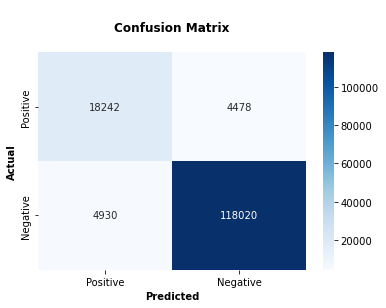

In [33]:
import seaborn as sns

title = 'Confusion Matrix'
custom_color = '#ffa600'   
from sklearn.metrics import confusion_matrix
def draw_confusion_matrix(cm,title = title,color = custom_color):
    palette = sns.light_palette(color, as_cmap=True)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='d', cmap='Blues')
    # Title
    ax.set_title('\n' + title + '\n',
                 fontweight='bold',
                 fontstyle='normal', 
                )
    # x y labels 
    ax.set_xlabel('Predicted', fontweight='bold')
    ax.set_ylabel('Actual', fontweight='bold');
    x_names = ['Positive', 'Negative']
    y_names = ['Positive', 'Negative']
    ax.xaxis.set_ticklabels(x_names, ha = 'center')
    ax.yaxis.set_ticklabels(y_names, va = 'center')
from sklearn.metrics import confusion_matrix

y_test_pred = model.predict_classes(X_test)
cm = confusion_matrix(y_test, y_test_pred)

draw_confusion_matrix(cm)

In [35]:
def plot_roc_curve(fpr, tpr, roc_auc):
    plt.plot(fpr, tpr, custom_color, label='Area: %0.3f' %roc_auc, linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate - Recall')
    plt.legend(loc='lower right')
    plt.show()

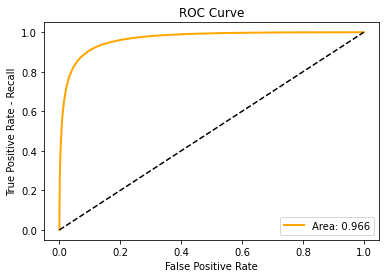

In [36]:
from sklearn.metrics import roc_curve, auc

y_test_prob = model.predict(X_test)

fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

plot_roc_curve(fpr, tpr, roc_auc)

In [38]:
X_new = X_test[:5]
y_prob = model.predict(X_new)
print(y_prob.round(3))

[[0.001]
 [0.998]
 [0.852]
 [0.99 ]
 [0.996]]


In [39]:
y_pred = model.predict_classes(X_new)
print(y_pred)

[[0]
 [1]
 [1]
 [1]
 [1]]


In [40]:
yhat_probs = model.predict(X_test, verbose=0)
yhat_classes = model.predict_classes(X_test, verbose=0)

In [41]:
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

In [42]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)

Accuracy: 0.935416
Precision: 0.963444
Recall: 0.959902
F1 score: 0.961670
